# Exploración de datos

En este capítulo se realiza una primera aproximación a la base de datos.  
El objetivo es conocer la estructura, identificar las variables disponibles y revisar sus características principales.

**Puntos clave:**
- Cargar la base de datos en memoria.
- Verificar el número de observaciones y variables.
- Analizar el tipo de datos de cada columna (numéricas, categóricas, fechas).
- Observar las primeras filas para familiarizarse con la información.

Esta exploración inicial es fundamental para planear el análisis de valores nulos y decidir qué técnicas de imputación aplicar más adelante.


Archivo cargado: base_imputacion_mixta_1000.csv | Dimensiones: (1000, 12)


,fecha,sexo,ciudad,nivel_educativo,segmento,estado_civil,edad,altura_cm,ingresos,gasto_mensual,puntuacion_credito,demanda
0,2024-01-01,F,Medellín,NaN,B,Unión libre,19.0,161.821754,3574.753806,1832.731832,640.465372,119.202995
1,2024-01-02,F,Barranquilla,NaN,B,NaN,52.0,167.819566,3163.626815,NaN,533.108430,124.457874
2,2024-01-03,M,Bogotá,Secundaria,B,Soltero/a,38.0,165.756219,2765.672259,1219.535074,491.016910,NaN
3,2024-01-04,F,Bogotá,NaN,B,Casado/a,57.0,160.642670,4320.397345,1908.324816,NaN,129.426792
4,2024-01-05,M,Cali,Técnico,B,Soltero/a,67.0,151.402909,NaN,1887.385697,610.213994,133.916319
5,2024-01-06,M,Barranquilla,Universitario,NaN,NaN,46.0,NaN,5455.272957,2408.441765,NaN,122.642679
6,2024-01-07,F,Cali,NaN,C,NaN,60.0,175.137932,2769.800963,464.616215,559.426043,128.250629
7,2024-01-08,M,Bogotá,Universitario,A,Unión libre,59.0,164.865325,5075.966681,2529.546803,553.506731,125.662780
8,2024-01-09,NaN,Bogotá,Secundaria,C,NaN,55.0,180.519374,4544.179791,2135.615650,636.247409,NaN
9,2024-01-10,F,Barranquilla,Técnico,B,Soltero/a,53.0,165.684648,5968.280833,2600.299853,NaN,124.178138


Memoria total: 0.41 MB


,fecha,sexo,ciudad,nivel_educativo,segmento,estado_civil,edad,altura_cm,ingresos,gasto_mensual,puntuacion_credito,demanda
dtype,object,object,object,object,object,object,float64,float64,float64,float64,float64,float64


,faltantes,%
puntuacion_credito,500,50.0
estado_civil,350,35.0
gasto_mensual,250,25.0
segmento,200,20.0
demanda,150,15.0
ingresos,120,12.0
nivel_educativo,100,10.0
altura_cm,80,8.0
ciudad,50,5.0
edad,30,3.0


Numéricas: 6 | Categóricas: 6


,count,mean,std,min,25%,50%,75%,max
edad,970.0,42.861856,14.621382,18.000000,30.000000,43.000000,55.000000,69.000000
altura_cm,920.0,167.760096,9.275530,140.000000,161.488768,167.714614,173.999069,195.766921
ingresos,880.0,3681.294745,1079.326096,487.662547,2999.416229,3669.620507,4375.093656,7016.246936
gasto_mensual,750.0,1687.810749,582.070174,100.000000,1309.239768,1676.193764,2063.260990,3532.593603
puntuacion_credito,500.0,599.077500,79.828186,373.657944,544.467843,599.692595,653.345068,823.539585
demanda,850.0,160.305759,25.357794,99.875828,139.505538,160.721251,181.100754,222.093047


,count,nunique,top
fecha,1000,1000,2024-01-01
sexo,980,2,F
ciudad,950,5,Bogotá
nivel_educativo,900,4,Secundaria
segmento,800,3,B
estado_civil,650,4,Soltero/a


,edad,altura_cm,ingresos,gasto_mensual,puntuacion_credito,demanda
edad,1.00,0.03,0.54,0.44,0.02,-0.02
altura_cm,0.03,1.00,0.07,0.02,-0.07,0.05
ingresos,0.54,0.07,1.00,0.81,0.07,-0.01
gasto_mensual,0.44,0.02,0.81,1.00,0.14,0.03
puntuacion_credito,0.02,-0.07,0.07,0.14,1.00,-0.06
demanda,-0.02,0.05,-0.01,0.03,-0.06,1.00


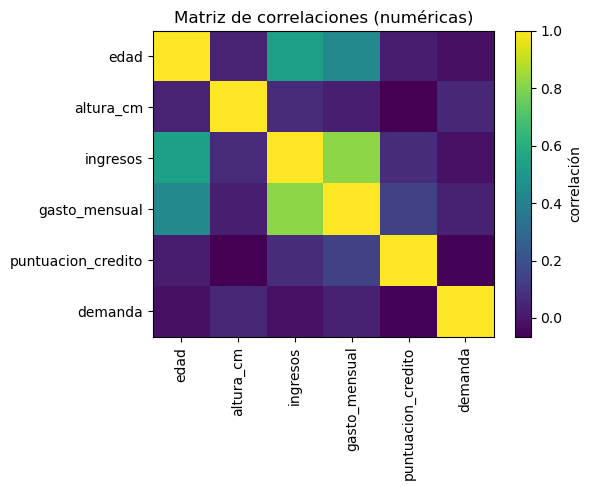

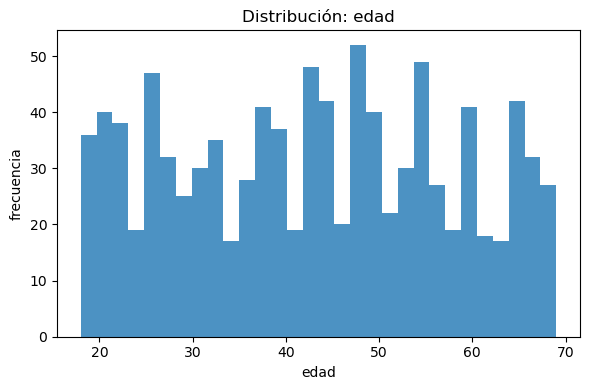

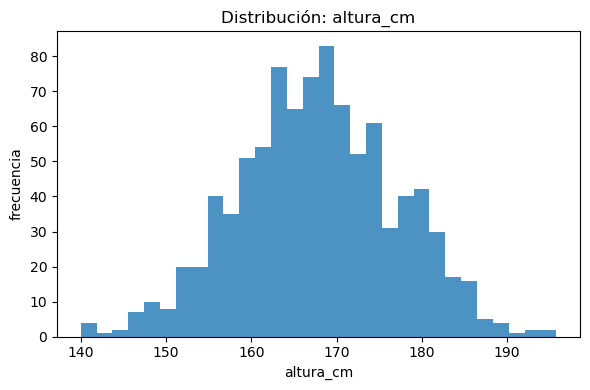

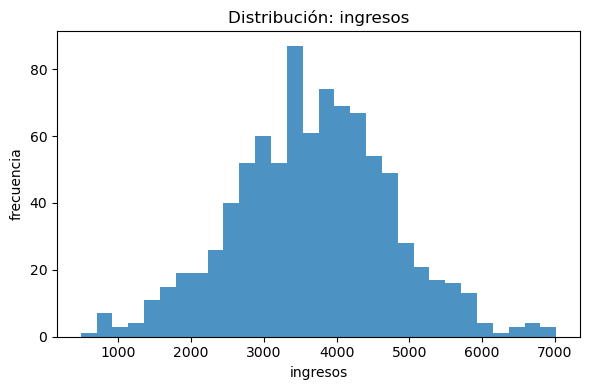

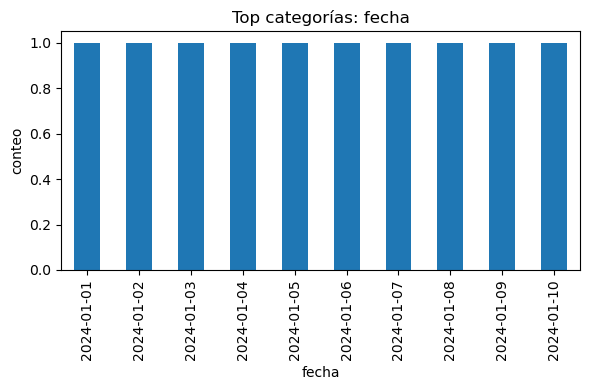

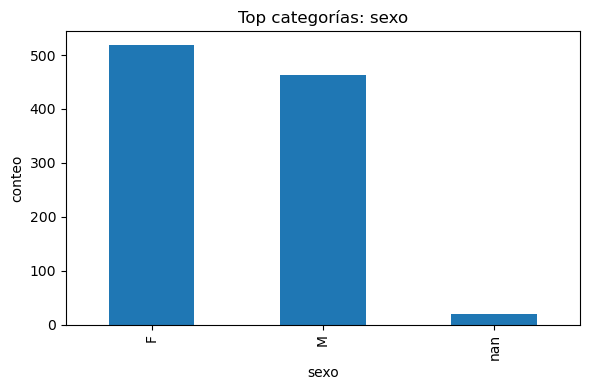

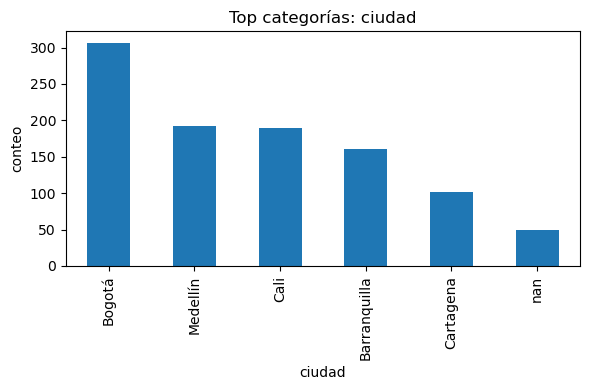

In [1]:
# ================================
# Exploración de datos (EDA)
# ================================
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt

# ------------------------
# 1) Cargar dataset
# ------------------------
csv_path = Path.cwd().parent / "base_imputacion_mixta_1000.csv"
df = pd.read_csv(csv_path)

print("Archivo cargado:", csv_path.name, "| Dimensiones:", df.shape)
display(df.head(10))

# ------------------------
# 2) Tipos, memoria y nulos
# ------------------------
dtypes = df.dtypes.to_frame("dtype")
mem_mb = df.memory_usage(deep=True).sum() / (1024**2)

nul_counts = df.isna().sum()
nul_pct = df.isna().mean() * 100
faltantes = pd.DataFrame({
    "faltantes": nul_counts,
    "%": nul_pct.round(2)
}).sort_values("%", ascending=False)

print(f"Memoria total: {mem_mb:.2f} MB")
display(dtypes.T)           # tipos
display(faltantes.head(20)) # top 20 en faltantes

# ------------------------
# 3) Separar por tipo
# ------------------------
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = [c for c in df.columns if c not in num_cols]
print("Numéricas:", len(num_cols), "| Categóricas:", len(cat_cols))

# ------------------------
# 4) Resumen estadístico
# ------------------------
desc_num = df[num_cols].describe().T
# para categóricas: conteo, únicos y moda
desc_cat = pd.DataFrame({
    "count": df[cat_cols].count(),
    "nunique": df[cat_cols].nunique(),
    "top": [df[c].mode(dropna=True).iloc[0] if df[c].dropna().size else np.nan for c in cat_cols]
})
display(desc_num.head(10))
display(desc_cat.head(10))

# ------------------------
# 5) Valores únicos y ejemplos de categorías (útil para mirar codificación)
# ------------------------
ejemplos_cat = {}
for c in cat_cols[:5]:  # solo las primeras 5 para no saturar
    ejemplos_cat[c] = df[c].dropna().value_counts().head(10)
ejemplos_cat

# ------------------------
# 6) Correlación entre numéricas (con nulos ignorados)
# ------------------------
if len(num_cols) >= 2:
    corr = df[num_cols].corr(numeric_only=True)
    display(corr.round(2))

    plt.figure(figsize=(6, 5))
    plt.imshow(corr, interpolation="nearest", aspect="auto")
    plt.colorbar(label="correlación")
    plt.xticks(range(len(num_cols)), num_cols, rotation=90)
    plt.yticks(range(len(num_cols)), num_cols)
    plt.title("Matriz de correlaciones (numéricas)")
    plt.tight_layout()
    plt.show()

# ------------------------
# 7) Gráficos rápidos de distribución
# ------------------------
# Hist para primeras numéricas
for c in num_cols[:3]:
    plt.figure(figsize=(6,4))
    df[c].plot(kind="hist", bins=30, alpha=0.8)
    plt.title(f"Distribución: {c}")
    plt.xlabel(c); plt.ylabel("frecuencia")
    plt.tight_layout()
    plt.show()

# Barras para primeras categóricas
for c in cat_cols[:3]:
    plt.figure(figsize=(6,4))
    df[c].value_counts(dropna=False).head(10).plot(kind="bar")
    plt.title(f"Top categorías: {c}")
    plt.xlabel(c); plt.ylabel("conteo")
    plt.tight_layout()
    plt.show()


### Comentario del análisis exploratorio

1. **Valores faltantes**
   - Las variables con mayor proporción de nulos son:  
     - `puntuacion_credito` (50%), `estado_civil` (35%), `gasto_mensual` (25%) y `segmento` (20%).  
   - Variables con pocos nulos: `edad` (3%), `sexo` (2%) y `ciudad` (5%).  
   - `fecha` no presenta valores faltantes.

2. **Distribución de variables numéricas**
   - **Edad:** valores entre 18 y 69 años, distribución relativamente uniforme.  
   - **Altura_cm:** centrada en ~168 cm, con dispersión normal entre 140 y 196 cm.  
   - **Ingresos:** media ~3681, con distribución aproximadamente normal pero sesgo leve hacia la derecha.  
   - **Gasto_mensual:** media ~1688, concentrada entre 1000 y 2500.  
   - **Puntuación_credito:** promedio ~599, variando entre 374 y 824.  
   - **Demanda:** promedio ~160, con dispersión moderada.

3. **Distribución de variables categóricas**
   - **Sexo:** predominan mujeres (F), seguidas de hombres (M).  
   - **Ciudad:** Bogotá es la categoría más frecuente, seguida de Medellín y Cali.  
   - **Nivel educativo:** domina “Secundaria”, luego “Universitario” y “Técnico”.  
   - **Segmento:** mayor presencia en la categoría “B”.  
   - **Estado civil:** predominan los solteros/as.

4. **Correlaciones**
   - Fuerte correlación positiva entre `ingresos` y `gasto_mensual` (≈0.81).  
   - Relación moderada entre `edad` e `ingresos` (≈0.54).  
   - El resto de las correlaciones son bajas, lo que sugiere independencia relativa entre variables numéricas.

 **Conclusión:**  
El dataset combina datos **demográficos, económicos y de consumo**, con varios **nulos importantes en variables clave** (crédito, estado civil, segmento). Las distribuciones son en general coherentes, aunque se debe prestar atención a la imputación para evitar sesgos en las categorías dominantes y en ingresos/gasto.
